In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import pickle as pkl
import xml.etree.ElementTree as ET
import os
import sklearn
import mne
import tensorflow as tf
import pymc as pm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import tensorflow_probability as tfp


from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Dropout, GlobalAveragePooling2D, Flatten, Dense, InputLayer, SeparableConv2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from scipy.stats import ttest_rel, f_oneway
from statsmodels.formula.api import ols
from statsmodels.regression.mixed_linear_model import MixedLM
from statsmodels.formula.api import mixedlm


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/RF_Equal.pkl', 'rb') as file:
    RFresult = pkl.load(file)

In [3]:
RFresult

[{'subject': 6,
  'classifier': 'RF',
  'methodology': 'overlapping',
  'modality': 'picture',
  'accuracy': 0.6973684210526315,
  'confusion_matrix': [[57, 19], [26, 50]],
  'classification_report': {'0': {'precision': 0.6867469879518072,
    'recall': 0.75,
    'f1-score': 0.7169811320754716,
    'support': 76.0},
   '1': {'precision': 0.7246376811594203,
    'recall': 0.6578947368421053,
    'f1-score': 0.6896551724137931,
    'support': 76.0},
   'accuracy': 0.7039473684210527,
   'macro avg': {'precision': 0.7056923345556138,
    'recall': 0.7039473684210527,
    'f1-score': 0.7033181522446323,
    'support': 152.0},
   'weighted avg': {'precision': 0.7056923345556138,
    'recall': 0.7039473684210527,
    'f1-score': 0.7033181522446325,
    'support': 152.0}},
  'model_params': {'bootstrap': True,
   'ccp_alpha': 0.0,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 'sqrt',
   'max_leaf_nodes': None,
   'max_samples': None,
   'min_impurit

In [4]:
len(RFresult)

132

In [5]:
R_picture_accuracy_overlapping=[]
R_picture_accuracy_disjoint=[]
R_spoken_accuracy_overlapping=[]
R_spoken_accuracy_disjoint=[]
R_written_accuracy_overlapping=[]
R_written_accuracy_disjoint=[]

for i in range (len(RFresult)):
    if RFresult[i]['modality']=="picture" and RFresult[i]['methodology']=='overlapping' :
        R_picture_accuracy_overlapping.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="picture" and RFresult[i]['methodology']=='disjoint' :
        R_picture_accuracy_disjoint.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="spoken" and RFresult[i]['methodology']=='overlapping' :
        R_spoken_accuracy_overlapping.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="spoken" and RFresult[i]['methodology']=='disjoint' :
        R_spoken_accuracy_disjoint.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="written" and RFresult[i]['methodology']=='overlapping' :
        R_written_accuracy_overlapping.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="written" and RFresult[i]['methodology']=='disjoint' :
        R_written_accuracy_disjoint.append(RFresult[i]['accuracy'])
    


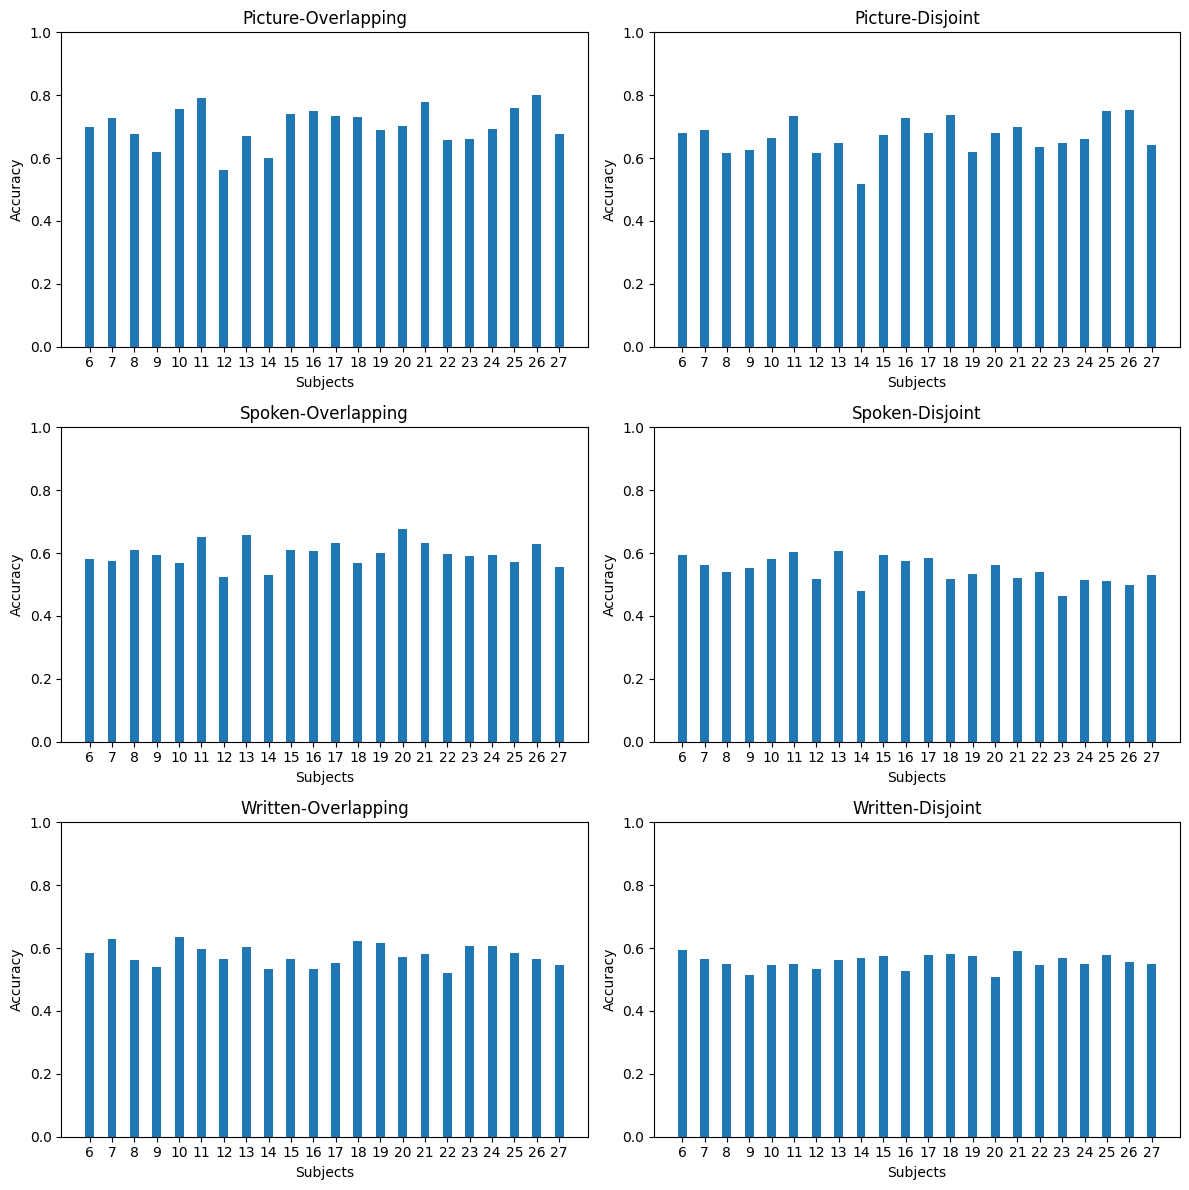

In [45]:
import matplotlib.pyplot as plt

R_accuracy_list = [
R_picture_accuracy_overlapping,
R_picture_accuracy_disjoint,
R_spoken_accuracy_overlapping,
R_spoken_accuracy_disjoint,
R_written_accuracy_overlapping,
R_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, R_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0)  

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.savefig('D:/Maynooth Coursework/Final_Project/Report/Graphs/RF_Performance.svg')
plt.show()

In [2]:
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/EEGNET_Equal.pkl', 'rb') as file:
    ENresult = pkl.load(file)

In [3]:
ENresult

[{'subject': 6,
  'classifier': 'EEGNET',
  'methodology': 'overlapping',
  'modality': 'picture',
  'accuracy': 0.8519736842105263,
  'confusion_matrix': [[63, 13], [13, 63]],
  'classification_report': {'0': {'precision': 0.8289473684210527,
    'recall': 0.8289473684210527,
    'f1-score': 0.8289473684210527,
    'support': 76.0},
   '1': {'precision': 0.8289473684210527,
    'recall': 0.8289473684210527,
    'f1-score': 0.8289473684210527,
    'support': 76.0},
   'accuracy': 0.8289473684210527,
   'macro avg': {'precision': 0.8289473684210527,
    'recall': 0.8289473684210527,
    'f1-score': 0.8289473684210527,
    'support': 152.0},
   'weighted avg': {'precision': 0.8289473684210527,
    'recall': 0.8289473684210527,
    'f1-score': 0.8289473684210527,
    'support': 152.0}}},
 {'subject': 6,
  'classifier': 'EEGNET',
  'methodology': 'disjoint',
  'modality': 'picture',
  'accuracy': 0.799342105263158,
  'confusion_matrix': [[61, 15], [18, 58]],
  'classification_report': {'0'

In [4]:
len(ENresult)

132

In [5]:
E_picture_accuracy_overlapping=[]
E_picture_accuracy_disjoint=[]
E_spoken_accuracy_overlapping=[]
E_spoken_accuracy_disjoint=[]
E_written_accuracy_overlapping=[]
E_written_accuracy_disjoint=[]

for i in range (len(ENresult)):
    if ENresult[i]['modality']=="picture" and ENresult[i]['methodology']=='overlapping' :
        E_picture_accuracy_overlapping.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="picture" and ENresult[i]['methodology']=='disjoint' :
        E_picture_accuracy_disjoint.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="spoken" and ENresult[i]['methodology']=='overlapping' :
        E_spoken_accuracy_overlapping.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="spoken" and ENresult[i]['methodology']=='disjoint' :
        E_spoken_accuracy_disjoint.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="written" and ENresult[i]['methodology']=='overlapping' :
        E_written_accuracy_overlapping.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="written" and ENresult[i]['methodology']=='disjoint' :
        E_written_accuracy_disjoint.append(ENresult[i]['accuracy'])
    


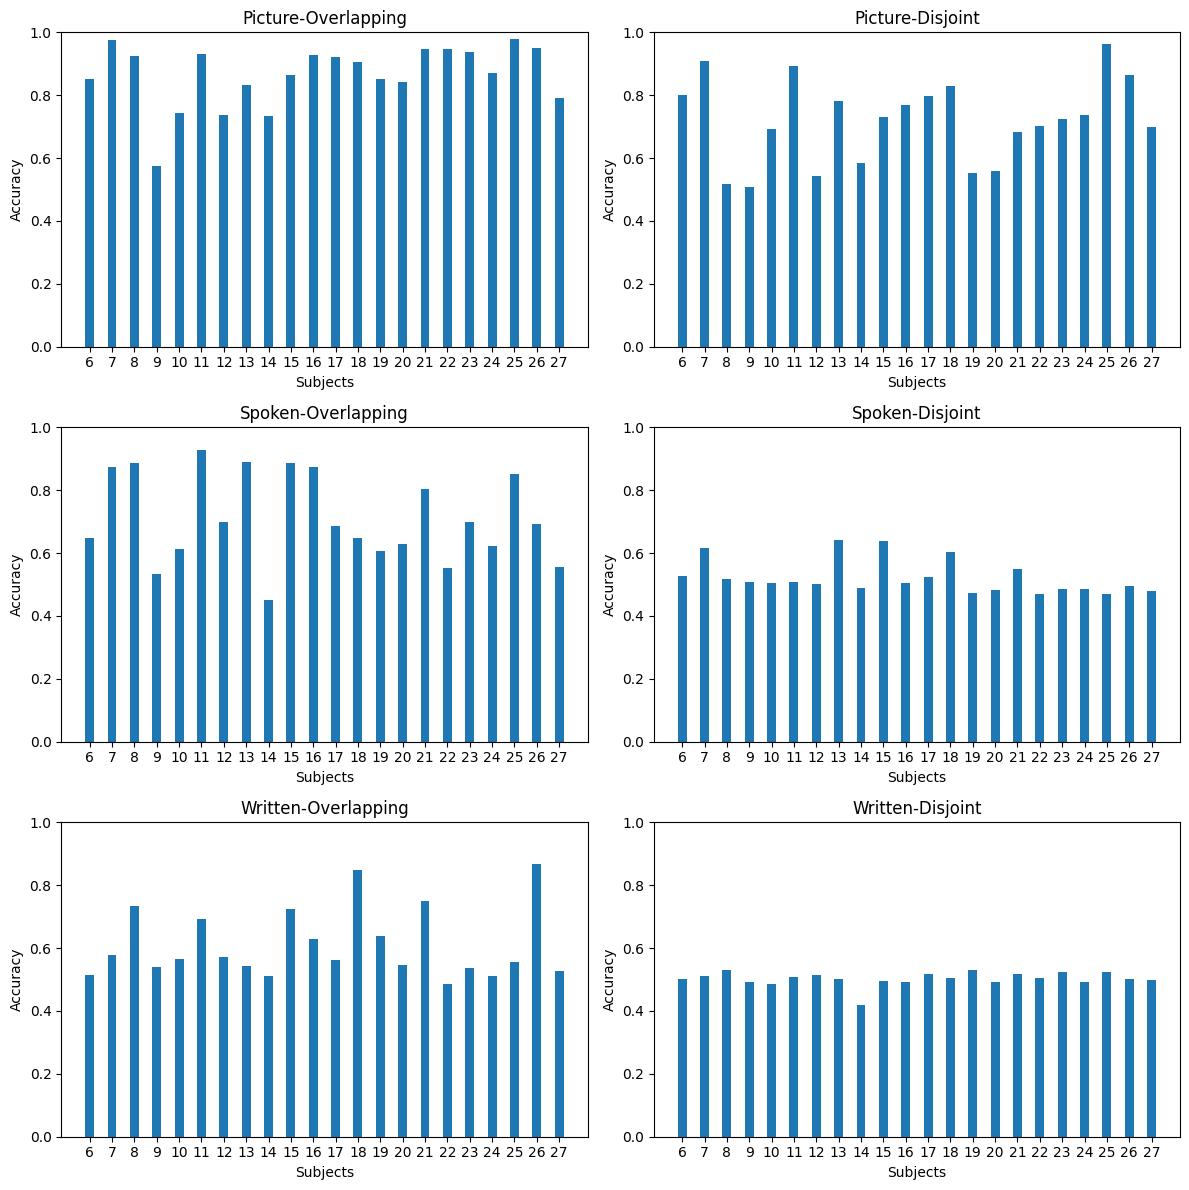

In [7]:

E_accuracy_list = [
E_picture_accuracy_overlapping,
E_picture_accuracy_disjoint,
E_spoken_accuracy_overlapping,
E_spoken_accuracy_disjoint,
E_written_accuracy_overlapping,
E_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, E_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0)  # Set the y-axis limit from 0.0 to 1.0

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.savefig('D:/Maynooth Coursework/Final_Project/Report/Graphs/EEGNET_Performance.svg')
plt.show()


In [12]:
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/DeepConvNet_Equal.pkl', 'rb') as file:
    DCNresult = pkl.load(file)

In [13]:
DCNresult

[{'subject': 6,
  'classifier': 'DeepConvNet',
  'methodology': 'overlapping',
  'modality': 'picture',
  'accuracy': 0.8519736842105263,
  'confusion_matrix': [[62, 14], [10, 66]],
  'classification_report': {'0': {'precision': 0.8611111111111112,
    'recall': 0.8157894736842105,
    'f1-score': 0.8378378378378378,
    'support': 76.0},
   '1': {'precision': 0.825,
    'recall': 0.868421052631579,
    'f1-score': 0.8461538461538461,
    'support': 76.0},
   'accuracy': 0.8421052631578947,
   'macro avg': {'precision': 0.8430555555555556,
    'recall': 0.8421052631578947,
    'f1-score': 0.841995841995842,
    'support': 152.0},
   'weighted avg': {'precision': 0.8430555555555556,
    'recall': 0.8421052631578947,
    'f1-score': 0.841995841995842,
    'support': 152.0}}},
 {'subject': 6,
  'classifier': 'DeepConvNet',
  'methodology': 'disjoint',
  'modality': 'picture',
  'accuracy': 0.5476973684210527,
  'confusion_matrix': [[33, 43], [30, 46]],
  'classification_report': {'0': {'p

In [14]:
len(DCNresult)

132

In [46]:
D_picture_accuracy_overlapping=[]
D_picture_accuracy_disjoint=[]
D_spoken_accuracy_overlapping=[]
D_spoken_accuracy_disjoint=[]
D_written_accuracy_overlapping=[]
D_written_accuracy_disjoint=[]

for i in range (len(DCNresult)):
    if DCNresult[i]['modality']=="picture" and DCNresult[i]['methodology']=='overlapping' :
        D_picture_accuracy_overlapping.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="picture" and DCNresult[i]['methodology']=='disjoint' :
        D_picture_accuracy_disjoint.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="spoken" and DCNresult[i]['methodology']=='overlapping' :
        D_spoken_accuracy_overlapping.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="spoken" and DCNresult[i]['methodology']=='disjoint' :
        D_spoken_accuracy_disjoint.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="written" and DCNresult[i]['methodology']=='overlapping' :
        D_written_accuracy_overlapping.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="written" and DCNresult[i]['methodology']=='disjoint' :
        D_written_accuracy_disjoint.append(DCNresult[i]['accuracy'])

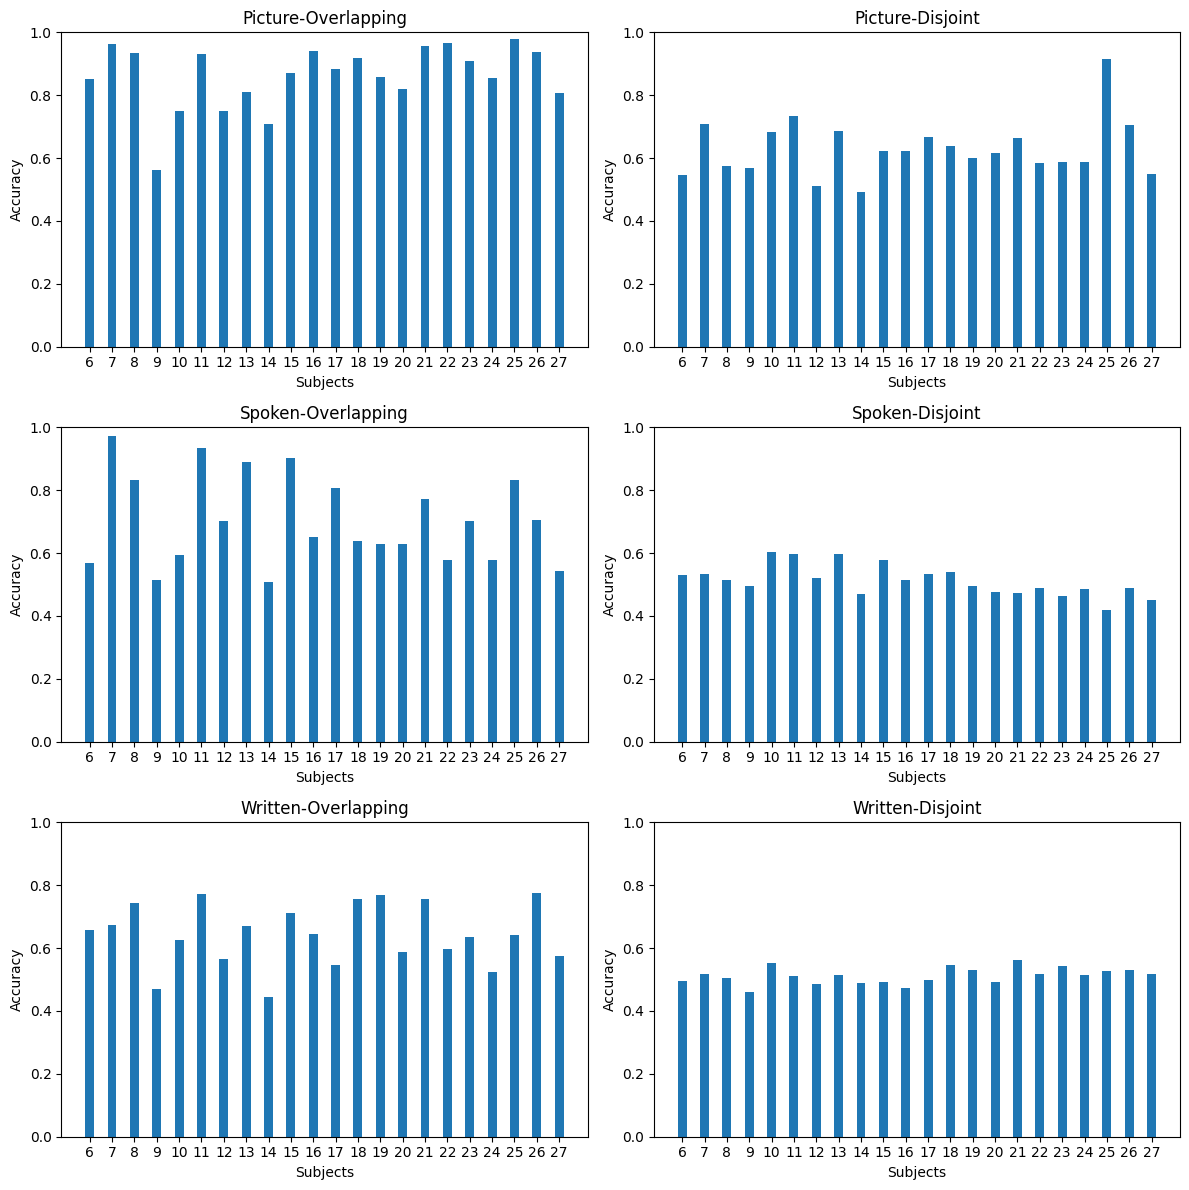

In [48]:
D_accuracy_list = [
D_picture_accuracy_overlapping,
D_picture_accuracy_disjoint,
D_spoken_accuracy_overlapping,
D_spoken_accuracy_disjoint,
D_written_accuracy_overlapping,
D_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, D_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0)

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.savefig('D:/Maynooth Coursework/Final_Project/Report/Graphs/DCN_Performance.svg')
plt.show()


In [18]:
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/BM_Equal.pkl', 'rb') as file:
    BMresult = pkl.load(file)

In [19]:
BMresult

[{'subject': 6,
  'classifier': 'Bayesian',
  'methodology': 'overlapping',
  'modality': 'picture',
  'accuracy': 0.7664473684210525,
  'confusion_matrix': [[60, 16], [25, 51]],
  'classification_report': {'0': {'precision': 0.7058823529411765,
    'recall': 0.7894736842105263,
    'f1-score': 0.7453416149068324,
    'support': 76},
   '1': {'precision': 0.7611940298507462,
    'recall': 0.6710526315789473,
    'f1-score': 0.7132867132867132,
    'support': 76},
   'accuracy': 0.7302631578947368,
   'macro avg': {'precision': 0.7335381913959613,
    'recall': 0.7302631578947368,
    'f1-score': 0.7293141640967729,
    'support': 152},
   'weighted avg': {'precision': 0.7335381913959613,
    'recall': 0.7302631578947368,
    'f1-score': 0.7293141640967729,
    'support': 152}}},
 {'subject': 6,
  'classifier': 'Bayesian',
  'methodology': 'disjoint',
  'modality': 'picture',
  'accuracy': 0.7220394736842106,
  'confusion_matrix': [[0, 0], [39, 113]],
  'classification_report': {'0': {'

In [20]:
len(BMresult)

132

In [49]:
B_picture_accuracy_overlapping=[]
B_picture_accuracy_disjoint=[]
B_spoken_accuracy_overlapping=[]
B_spoken_accuracy_disjoint=[]
B_written_accuracy_overlapping=[]
B_written_accuracy_disjoint=[]

for i in range (len(BMresult)):
    if BMresult[i]['modality']=="picture" and BMresult[i]['methodology']=='overlapping' :
        B_picture_accuracy_overlapping.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="picture" and BMresult[i]['methodology']=='disjoint' :
        B_picture_accuracy_disjoint.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="spoken" and BMresult[i]['methodology']=='overlapping' :
        B_spoken_accuracy_overlapping.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="spoken" and BMresult[i]['methodology']=='disjoint' :
        B_spoken_accuracy_disjoint.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="written" and BMresult[i]['methodology']=='overlapping' :
        B_written_accuracy_overlapping.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="written" and BMresult[i]['methodology']=='disjoint' :
        B_written_accuracy_disjoint.append(BMresult[i]['accuracy'])

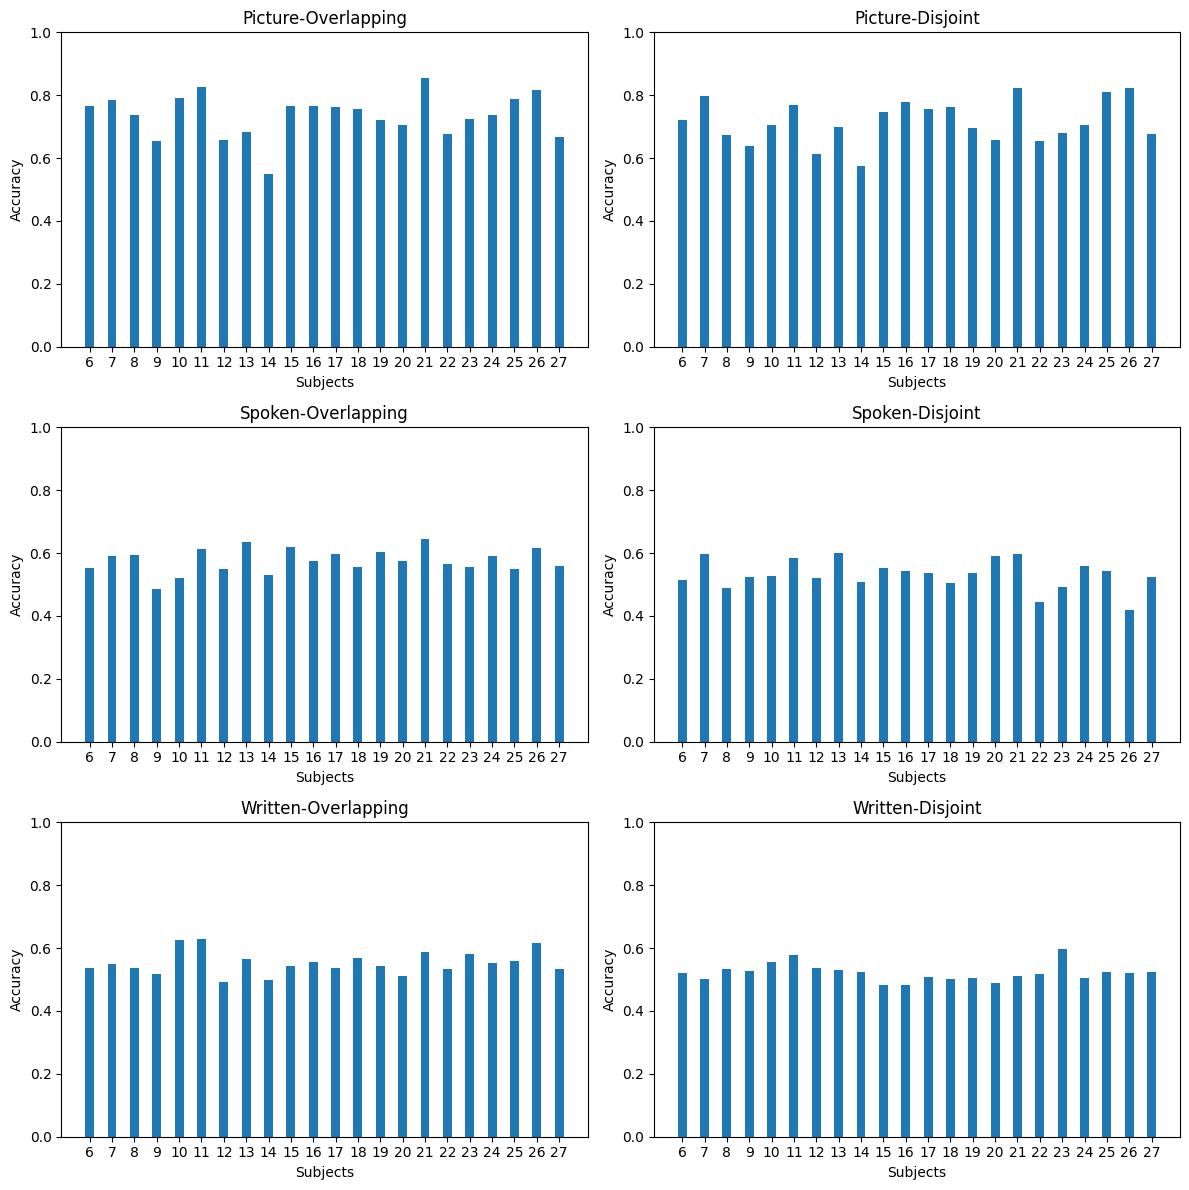

In [50]:
B_accuracy_list = [
B_picture_accuracy_overlapping,
B_picture_accuracy_disjoint,
B_spoken_accuracy_overlapping,
B_spoken_accuracy_disjoint,
B_written_accuracy_overlapping,
B_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, B_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0)

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.savefig('D:/Maynooth Coursework/Final_Project/Report/Graphs/BM_Performance.svg')
plt.show()


In [23]:
Result= RFresult+ ENresult+ DCNresult+ BMresult

In [24]:
len(Result)

528

In [25]:



accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))

# Populate the dictionary
for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy

# Step 2: Calculate Differences
accuracy_differences = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'raw_difference': None, 'proportional_difference': None})))

for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = methods['overlapping']
            disjoint_acc = methods['disjoint']
            
            if overlapping_acc is not None and disjoint_acc is not None:
                raw_diff = overlapping_acc - disjoint_acc
                prop_diff = raw_diff / disjoint_acc if disjoint_acc != 0 else None
                
                accuracy_differences[classifier][subject][modality] = {
                    'raw_difference': raw_diff,
                    'proportional_difference': prop_diff,
                    'Overlapping_accuracy':overlapping_acc,
                    'Disjoint_accuracy':disjoint_acc
                }

# Step 3: Output the Results
for classifier, subjects in accuracy_differences.items():
    for subject, modalities in subjects.items():
        for modality, diffs in modalities.items():
            raw_diff = diffs['raw_difference']
            prop_diff = diffs['proportional_difference']
            prop_diff_str = f"{prop_diff:.4f}" if prop_diff is not None else "N/A"
            o_acc = diffs['Overlapping_accuracy']
            d_acc = diffs['Disjoint_accuracy']
            
            print(f"Classifier: {classifier}, Subject: {subject}, Modality: {modality}")
            print(f"  Overlapping Accuracy: {o_acc:.4f}  Disjoint Accuracy: {d_acc:.4f}")
            print(f"  Raw Difference: {raw_diff:.4f}")
            print(f"  Proportional Difference: {prop_diff_str}\n")


Classifier: RF, Subject: 6, Modality: picture
  Overlapping Accuracy: 0.6974  Disjoint Accuracy: 0.6809
  Raw Difference: 0.0164
  Proportional Difference: 0.0242

Classifier: RF, Subject: 6, Modality: spoken
  Overlapping Accuracy: 0.5800  Disjoint Accuracy: 0.5933
  Raw Difference: -0.0133
  Proportional Difference: -0.0225

Classifier: RF, Subject: 6, Modality: written
  Overlapping Accuracy: 0.5833  Disjoint Accuracy: 0.5933
  Raw Difference: -0.0100
  Proportional Difference: -0.0169

Classifier: RF, Subject: 7, Modality: picture
  Overlapping Accuracy: 0.7273  Disjoint Accuracy: 0.6883
  Raw Difference: 0.0390
  Proportional Difference: 0.0566

Classifier: RF, Subject: 7, Modality: spoken
  Overlapping Accuracy: 0.5743  Disjoint Accuracy: 0.5608
  Raw Difference: 0.0135
  Proportional Difference: 0.0241

Classifier: RF, Subject: 7, Modality: written
  Overlapping Accuracy: 0.6301  Disjoint Accuracy: 0.5659
  Raw Difference: 0.0642
  Proportional Difference: 0.1134

Classifier: RF

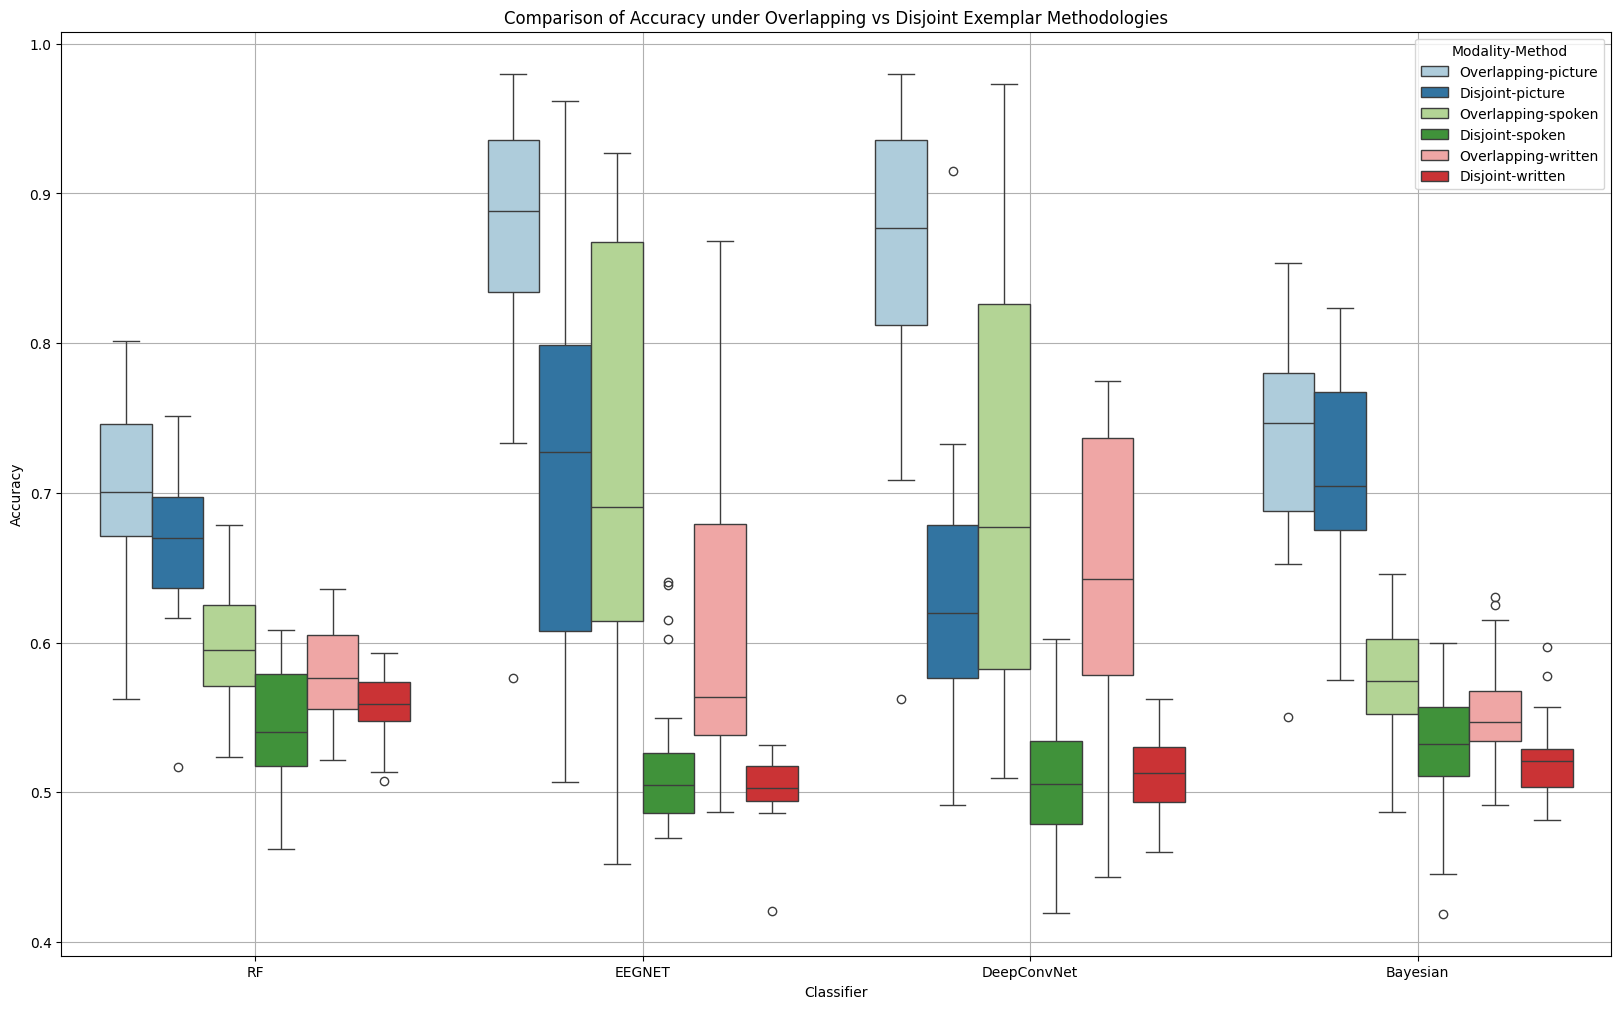

In [51]:
accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))

# Populate the dictionary
for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy

# Flatten the dictionary into a list of dictionaries for DataFrame creation
data_list = []
for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methodologies in modalities.items():
            for methodology, accuracy in methodologies.items():
                if accuracy is not None:
                    data_list.append({
                        'Classifier': classifier,
                        'Subject': subject,
                        'Modality': modality,
                        'Type': methodology.capitalize(),
                        'Accuracy': accuracy
                    })



df = pd.DataFrame(data_list)

# Melt the DataFrame to create a 'combined' column for better separation
df['Combined'] = df['Type'] + '-' + df['Modality']
plt.figure(figsize=(20, 12))

# BOXplots
sns.boxplot(x='Classifier', y='Accuracy', hue='Combined', data=df, palette='Paired')

plt.title('Comparison of Accuracy under Overlapping vs Disjoint Exemplar Methodologies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', title='Modality-Method')
plt.grid(True)
plt.savefig('D:/Maynooth Coursework/Final_Project/Report/Graphs/BoxPlot.svg')
plt.show()

In [27]:


accuracy_data = defaultdict(lambda: {'overlapping': [], 'disjoint': []})

for result in Result:
    classifier = result['classifier']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[(classifier, modality)][methodology].append(accuracy)

accuracy_differences = {}

# Calculating differences only if both methodologies have data
for key, methods in accuracy_data.items():
    classifier, modality = key
    
    overlapping_accuracies = methods['overlapping']
    disjoint_accuracies = methods['disjoint']
    
    # Checking for pairs of accuracies
    if not overlapping_accuracies or not disjoint_accuracies:
        print(f"Warning: Missing accuracies for {classifier} - {modality}")
        continue
    
    # Average accuracies
    avg_overlapping = sum(overlapping_accuracies) / len(overlapping_accuracies)
    avg_disjoint = sum(disjoint_accuracies) / len(disjoint_accuracies)
    
    raw_diff = avg_overlapping - avg_disjoint
    prop_diff = raw_diff / avg_disjoint if avg_disjoint != 0 else None


    accuracy_differences[(classifier, modality)] = {
        'raw_difference': raw_diff,
        'proportional_difference': prop_diff,
        'Overlapping_accuracy':avg_overlapping,
        'Disjoint_accuracy':avg_disjoint
    }


for key, diffs in accuracy_differences.items():
    classifier, modality = key
    raw_diff = diffs['raw_difference']
    prop_diff = diffs['proportional_difference']
    prop_diff_str = f"{prop_diff:.4f}" if prop_diff is not None else "N/A"
    o_acc = diffs['Overlapping_accuracy']
    d_acc = diffs['Disjoint_accuracy']
    
    print(f"Classifier: {classifier}, Modality: {modality}")
    print(f"  Overlapping Accuracy: {o_acc:.4f}  Disjoint Accuracy: {d_acc:.4f}")
    print(f"  Raw Difference: {raw_diff:.4f}")
    print(f"  Proportional Difference: {prop_diff_str}\n")


Classifier: RF, Modality: picture
  Overlapping Accuracy: 0.7034  Disjoint Accuracy: 0.6678
  Raw Difference: 0.0355
  Proportional Difference: 0.0532

Classifier: RF, Modality: spoken
  Overlapping Accuracy: 0.5978  Disjoint Accuracy: 0.5446
  Raw Difference: 0.0532
  Proportional Difference: 0.0977

Classifier: RF, Modality: written
  Overlapping Accuracy: 0.5784  Disjoint Accuracy: 0.5573
  Raw Difference: 0.0211
  Proportional Difference: 0.0379

Classifier: EEGNET, Modality: picture
  Overlapping Accuracy: 0.8658  Disjoint Accuracy: 0.7197
  Raw Difference: 0.1461
  Proportional Difference: 0.2030

Classifier: EEGNET, Modality: spoken
  Overlapping Accuracy: 0.7102  Disjoint Accuracy: 0.5215
  Raw Difference: 0.1887
  Proportional Difference: 0.3619

Classifier: EEGNET, Modality: written
  Overlapping Accuracy: 0.6108  Disjoint Accuracy: 0.5028
  Raw Difference: 0.1081
  Proportional Difference: 0.2149

Classifier: DeepConvNet, Modality: picture
  Overlapping Accuracy: 0.8618  Dis

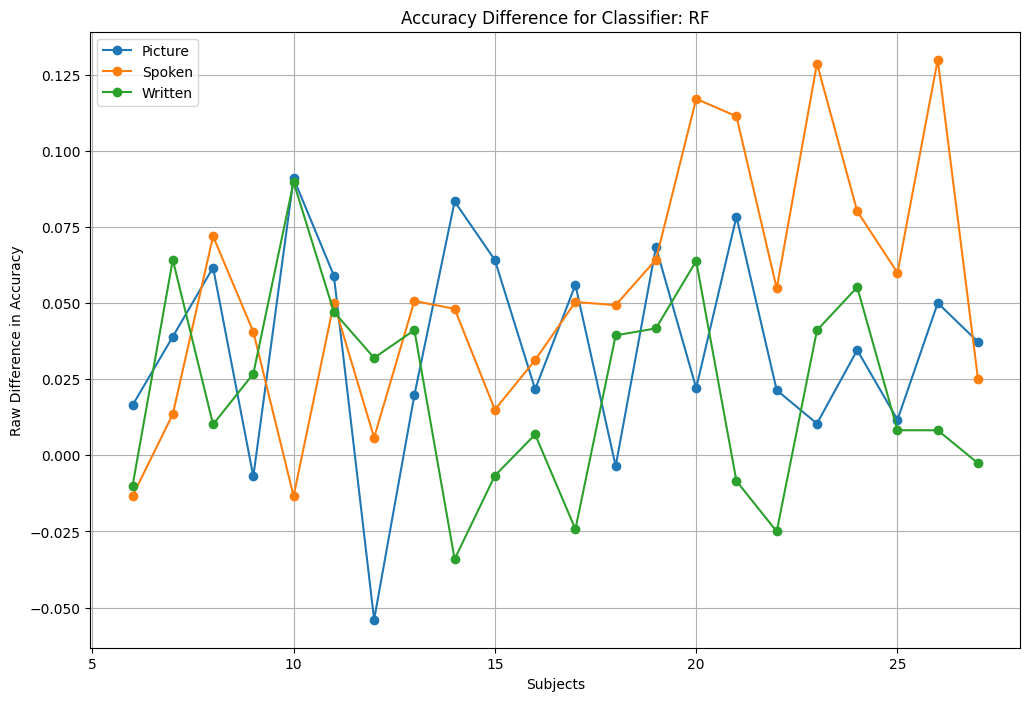

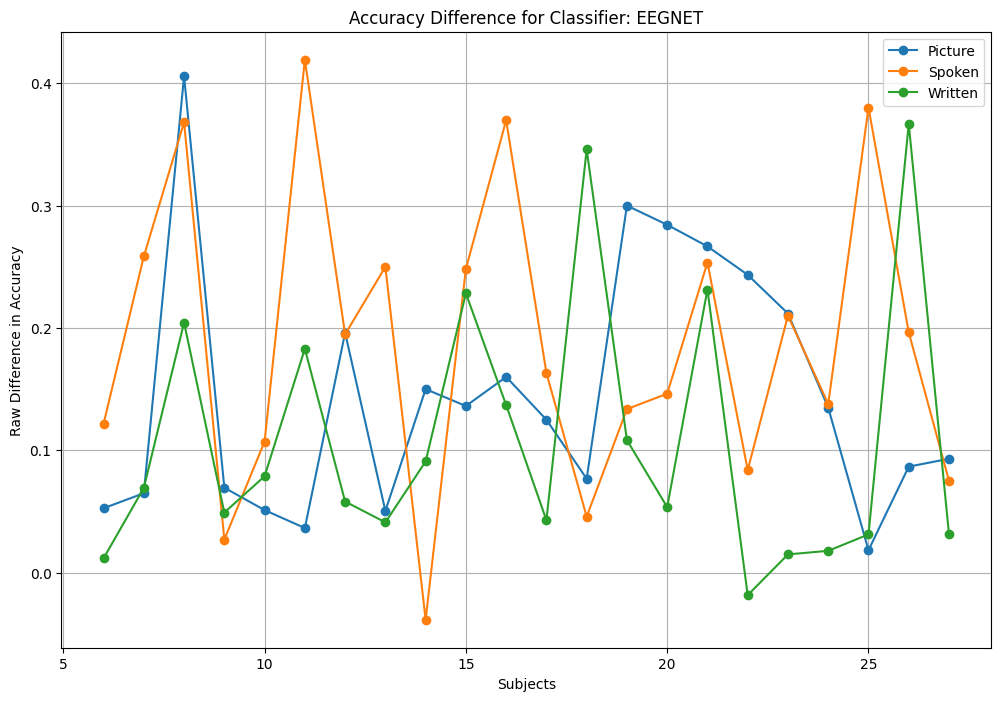

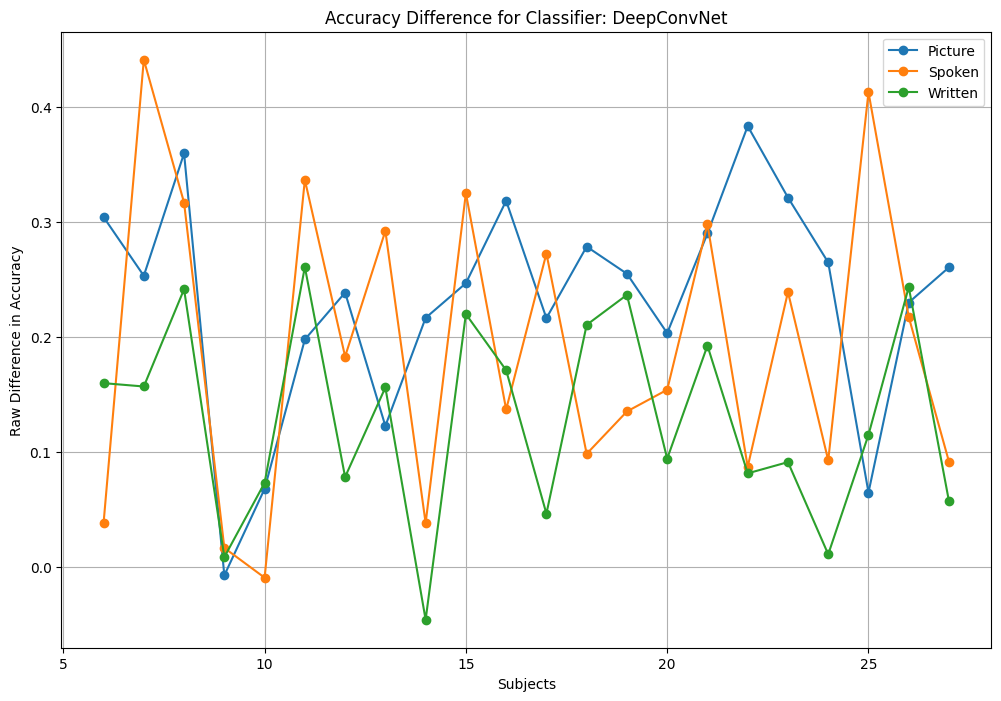

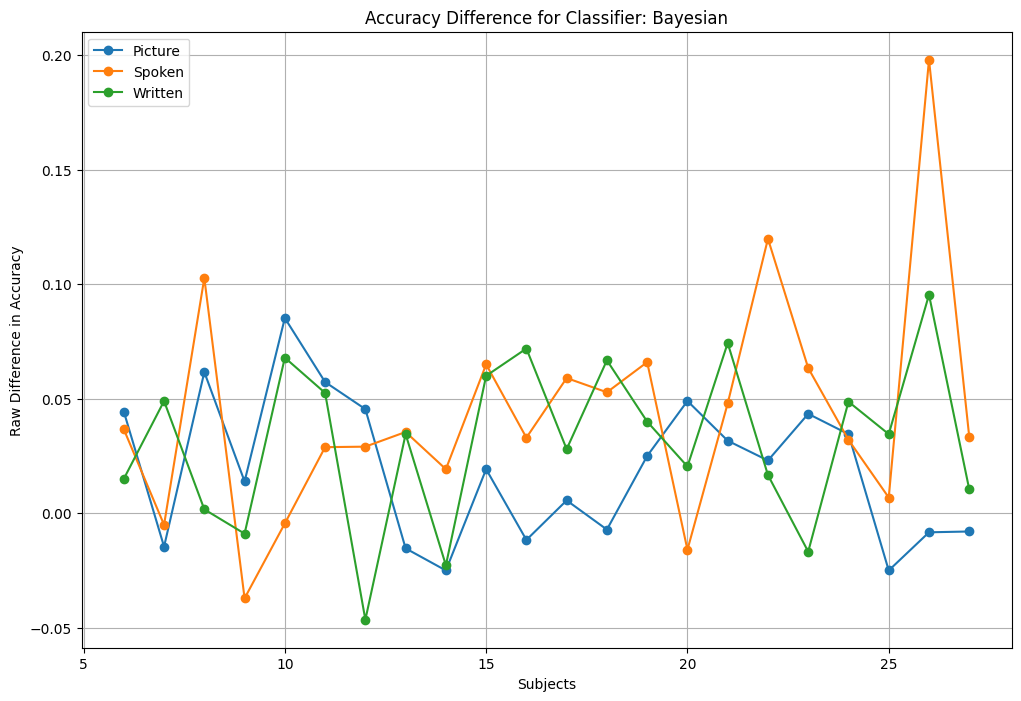

In [28]:

accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))


for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy


accuracy_differences = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'raw_difference': None, 'proportional_difference': None})))

for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = methods['overlapping']
            disjoint_acc = methods['disjoint']
            
            if overlapping_acc is not None and disjoint_acc is not None:
                raw_diff = overlapping_acc - disjoint_acc
                prop_diff = raw_diff / disjoint_acc if disjoint_acc != 0 else None
                
                accuracy_differences[classifier][subject][modality] = {
                    'raw_difference': raw_diff,
                    'proportional_difference': prop_diff
                }

for classifier, subjects in accuracy_differences.items():
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for modality in ['picture', 'spoken', 'written']:
        subjects_list = []
        raw_diffs = []
        
        for subject, modalities in subjects.items():
            if modality in modalities:
                subjects_list.append(subject)
                raw_diffs.append(modalities[modality]['raw_difference'])
        
        if raw_diffs:
            ax.plot(subjects_list, raw_diffs, marker='o', label=modality.capitalize())
    
    ax.set_xlabel('Subjects')
    ax.set_ylabel('Raw Difference in Accuracy')
    ax.set_title(f'Accuracy Difference for Classifier: {classifier}')
    ax.legend()
    plt.grid(True)
    plt.show()


In [29]:


accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))


for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy

#Differences
accuracy_differences = defaultdict(lambda: defaultdict(list))

for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = methods['overlapping']
            disjoint_acc = methods['disjoint']
            
            if overlapping_acc is not None and disjoint_acc is not None:
                raw_diff = overlapping_acc - disjoint_acc
                accuracy_differences[classifier][modality].append(raw_diff)

average_accuracy_increase = defaultdict(lambda: defaultdict(float))

for classifier, modalities in accuracy_differences.items():
    for modality, differences in modalities.items():
        if differences:
            average_accuracy_increase[classifier][modality] = sum(differences) / len(differences)


for classifier, modalities in average_accuracy_increase.items():
    print(f"Classifier: {classifier}")
    for modality, avg_increase in modalities.items():
        print(f"  Modality: {modality}, Average Accuracy Increase: {avg_increase:.4f}")



Classifier: RF
  Modality: picture, Average Accuracy Increase: 0.0355
  Modality: spoken, Average Accuracy Increase: 0.0532
  Modality: written, Average Accuracy Increase: 0.0211
Classifier: EEGNET
  Modality: picture, Average Accuracy Increase: 0.1461
  Modality: spoken, Average Accuracy Increase: 0.1887
  Modality: written, Average Accuracy Increase: 0.1081
Classifier: DeepConvNet
  Modality: picture, Average Accuracy Increase: 0.2313
  Modality: spoken, Average Accuracy Increase: 0.1917
  Modality: written, Average Accuracy Increase: 0.1302
Classifier: Bayesian
  Modality: picture, Average Accuracy Increase: 0.0193
  Modality: spoken, Average Accuracy Increase: 0.0439
  Modality: written, Average Accuracy Increase: 0.0315


In [30]:
from scipy.stats import ttest_rel
data_list = []
for result in Result:
    data_list.append({
        'Subject': result['subject'],
        'Classifier': result['classifier'],
        'Modality': result['modality'],
        'Methodology': result['methodology'],
        'Accuracy': result['accuracy']
    })

df = pd.DataFrame(data_list)

# Paired t-tests
results = []
for classifier in df['Classifier'].unique():
    for modality in df['Modality'].unique():
        subset = df[(df['Classifier'] == classifier) & (df['Modality'] == modality)]
        if not subset.empty:
            overlapping_acc = subset[subset['Methodology'] == 'overlapping']['Accuracy']
            disjoint_acc = subset[subset['Methodology'] == 'disjoint']['Accuracy']
            
            if len(overlapping_acc) == len(disjoint_acc):
                t_stat, p_value = ttest_rel(overlapping_acc, disjoint_acc)
                results.append({
                    'Classifier': classifier,
                    'Modality': modality,
                    't-statistic': t_stat,
                    'p-value': p_value
                })

# Create results DataFrame
results_df = pd.DataFrame(results)

# Interpret results
alpha = 0.05/(4*3)
results_df['Significant'] = results_df['p-value'] < alpha

# Display results
print(results_df)

     Classifier Modality  t-statistic       p-value  Significant
0            RF  picture     4.858222  8.382754e-05         True
1            RF   spoken     6.035737  5.451467e-06         True
2            RF  written     2.992204  6.944417e-03        False
3        EEGNET  picture     6.682687  1.296035e-06         True
4        EEGNET   spoken     7.250522  3.839882e-07         True
5        EEGNET  written     4.711175  1.188634e-04         True
6   DeepConvNet  picture    11.267003  2.307111e-10         True
7   DeepConvNet   spoken     6.857282  8.875840e-07         True
8   DeepConvNet  written     7.010041  6.394263e-07         True
9      Bayesian  picture     2.898831  8.587420e-03        False
10     Bayesian   spoken     4.124042  4.830033e-04         True
11     Bayesian  written     4.117912  4.901358e-04         True


In [53]:
import pandas as pd
from scipy.stats import ttest_rel

# Prepare the data list
data_list = []
for result in Result:
    data_list.append({
        'Subject': result['subject'],
        'Classifier': result['classifier'],
        'Modality': result['modality'],
        'Methodology': result['methodology'],
        'Accuracy': result['accuracy']
    })

df = pd.DataFrame(data_list)

# Paired t-tests
results = []
for classifier in df['Classifier'].unique():
    for modality in df['Modality'].unique():
        subset = df[(df['Classifier'] == classifier) & (df['Modality'] == modality)]
        if not subset.empty:
            overlapping_acc = subset[subset['Methodology'] == 'overlapping']['Accuracy']
            disjoint_acc = subset[subset['Methodology'] == 'disjoint']['Accuracy']
            
            if len(overlapping_acc) == len(disjoint_acc):
                t_stat, p_value = ttest_rel(overlapping_acc, disjoint_acc)
                results.append({
                    'Classifier': classifier,
                    'Modality': modality,
                    't-statistic': t_stat,
                    'p-value': p_value
                })

# Create results DataFrame
results_df = pd.DataFrame(results)

# Holm-Bonferroni correction
m = len(results_df)
print(m)
sorted_p_values = results_df['p-value'].sort_values().values
adjusted_p_values = []

for i, p_value in enumerate(sorted_p_values):
    # sig= p_value<(0.05/(m-i))
    adjusted_p_value = p_value * (m - i)
    adjusted_p_value = min(adjusted_p_value, 1.0)
    adjusted_p_values.append(adjusted_p_value)

# results_df['Significant']=sig
results_df['adjusted_p-value'] = adjusted_p_values

# # Interpret results
results_df['Significant'] = results_df['adjusted_p-value'] < 0.05

# Display results
print(results_df)


12
     Classifier Modality  t-statistic       p-value  adjusted_p-value  \
0            RF  picture     4.858222  8.382754e-05      2.768533e-09   
1            RF   spoken     6.035737  5.451467e-06      4.223870e-06   
2            RF  written     2.992204  6.944417e-03      6.394263e-06   
3        EEGNET  picture     6.682687  1.296035e-06      7.988256e-06   
4        EEGNET   spoken     7.250522  3.839882e-07      1.036828e-05   
5        EEGNET  written     4.711175  1.188634e-04      3.816027e-05   
6   DeepConvNet  picture    11.267003  2.307111e-10      5.029652e-04   
7   DeepConvNet   spoken     6.857282  8.875840e-07      5.943168e-04   
8   DeepConvNet  written     7.010041  6.394263e-07      1.932013e-03   
9      Bayesian  picture     2.898831  8.587420e-03      1.470408e-03   
10     Bayesian   spoken     4.124042  4.830033e-04      1.388883e-02   
11     Bayesian  written     4.117912  4.901358e-04      8.587420e-03   

    Significant  
0          True  
1          

In [56]:


accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))
accuracy_differences = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'raw_difference': None, 'proportional_difference': None})))

# Populate accuracy_data
for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy

# Calculate differences and populate accuracy_differences
for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = (methods['overlapping']-0.5)*100
            disjoint_acc = (methods['disjoint']-0.5)*100
            
            if overlapping_acc is not None and disjoint_acc is not None:
                raw_diff = overlapping_acc - disjoint_acc
                prop_diff = raw_diff / disjoint_acc if disjoint_acc != 0 else None
                
                accuracy_differences[classifier][subject][modality] = {
                    'overlapping_accuracy': overlapping_acc,
                    'disjoint_accuracy': disjoint_acc
                }

# Convert accuracy_differences to a DataFrame for modeling
data_for_model = []

for classifier, subjects in accuracy_differences.items():
    for subject, modalities in subjects.items():
        for modality, metrics in modalities.items():
            data_for_model.append({
                'classifier': classifier,
                'subject': subject,
                'modality': modality,
                'overlapping_accuracy': metrics['overlapping_accuracy'],
                'disjoint_accuracy': metrics['disjoint_accuracy']
            })

df_model = pd.DataFrame(data_for_model)

# Add modality-specific overlapping accuracies
df_model['overlapping_accuracy_spoken'] = df_model.apply(
    lambda row: row['overlapping_accuracy'] if row['modality'] == 'spoken' else 0, axis=1
)
df_model['overlapping_accuracy_written'] = df_model.apply(
    lambda row: row['overlapping_accuracy'] if row['modality'] == 'written' else 0, axis=1
)


model_formula = 'disjoint_accuracy ~ 0+overlapping_accuracy + overlapping_accuracy_spoken + overlapping_accuracy_written'


md = mixedlm(model_formula, df_model, groups=df_model['classifier'], re_formula="~1")
mdf = md.fit()


print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    disjoint_accuracy
No. Observations:    264        Method:                REML             
No. Groups:          4          Scale:                 29.2014          
Min. group size:     66         Log-Likelihood:        -832.2744        
Max. group size:     66         Converged:             Yes              
Mean group size:     66.0                                               
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
overlapping_accuracy          0.611    0.027  22.887 0.000  0.559  0.664
overlapping_accuracy_spoken  -0.420    0.037 -11.419 0.000 -0.492 -0.348
overlapping_accuracy_written -0.403    0.053  -7.641 0.000 -0.507 -0.300
Group Var                    11.600    1.597                         